In [6]:
# import rawpy
import cv2
import numpy as np
import imageio
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from PIL import Image

def convert_to_grayscale(input_file, output_file):
  """Converts a PNG image to 8-bit grayscale and saves it.

  Args:
    input_file: Path to the input PNG image.
    output_file: Path to save the converted grayscale image.
  """
  # Open the image
  image = Image.open(input_file)

  print(image.__dict__)

  # Convert to grayscale mode ("L" for grayscale)
  grayscale_image = image.convert("L")

  # Save the converted image
  grayscale_image.save(output_file)

# Example usage
input_file = "./input.png"
output_file = "grayscale.png"
convert_to_grayscale(input_file, output_file)
print(f"Converted {input_file} to grayscale and saved as {output_file}")


{'im': None, 'mode': 'P', '_size': (320, 338), 'palette': <PIL.ImagePalette.ImagePalette object at 0x7f0d404c5d30>, 'info': {}, '_category': 0, 'readonly': 1, 'pyaccess': None, '_exif': None, '_min_frame': 0, 'custom_mimetype': None, 'tile': [('zip', (0, 0, 320, 338), 821, 'P')], 'decoderconfig': (), 'decodermaxblock': 65536, 'fp': <_io.BufferedReader name='./input.png'>, 'filename': './input.png', '_exclusive_fp': True, '_fp': <_io.BufferedReader name='./input.png'>, '_PngImageFile__frame': 0, 'private_chunks': [], 'png': <PIL.PngImagePlugin.PngStream object at 0x7f0d404c5f10>, '_text': None, 'n_frames': 1, 'default_image': False, '_PngImageFile__prepare_idat': 72285, 'is_animated': False}
Converted ./input.png to grayscale and saved as grayscale.png


uint8
[  1.9921875   5.9765625   9.9609375  13.9453125  17.9296875  21.9140625
  25.8984375  29.8828125  33.8671875  37.8515625  41.8359375  45.8203125
  49.8046875  53.7890625  57.7734375  61.7578125  65.7421875  69.7265625
  73.7109375  77.6953125  81.6796875  85.6640625  89.6484375  93.6328125
  97.6171875 101.6015625 105.5859375 109.5703125 113.5546875 117.5390625
 121.5234375 125.5078125 129.4921875 133.4765625 137.4609375 141.4453125
 145.4296875 149.4140625 153.3984375 157.3828125 161.3671875 165.3515625
 169.3359375 173.3203125 177.3046875 181.2890625 185.2734375 189.2578125
 193.2421875 197.2265625 201.2109375 205.1953125 209.1796875 213.1640625
 217.1484375 221.1328125 225.1171875 229.1015625 233.0859375 237.0703125
 241.0546875 245.0390625 249.0234375 253.0078125]


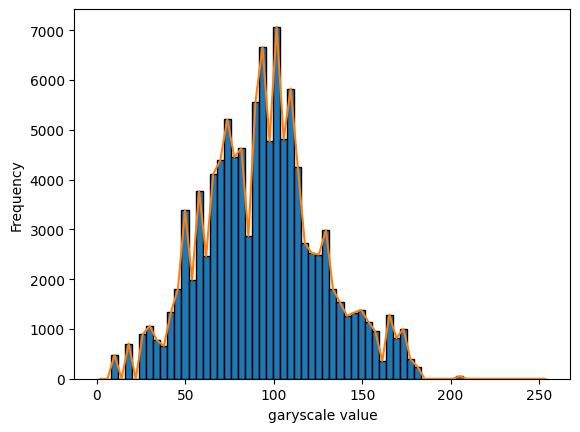

(64,)
(65,)


In [17]:
import cv2

def load_grayscale_image(image_path):
  """Loads an 8-bit grayscale PNG image using OpenCV.

  Args:
    image_path: Path to the PNG image.

  Returns:
    A NumPy array representing the grayscale image, 
    or None if the image cannot be loaded.
  """

  # Read the image in grayscale mode (IMREAD_GRAYSCALE flag)
  image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
  print(image.dtype)

  # Check if image loading was successful
  if image is None:
    print(f"Error: Could not load image from {image_path}")
    return None

  # Verify that the loaded image is grayscale (has only one channel)
  if len(image.shape) != 2:
    print(f"Warning: Image {image_path} has more than one channel. Converted to grayscale.")
    # Convert to grayscale if necessary (e.g., for color PNGs)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  return image

# Example usage
image_path = "grayscale.png"
grayscale_image = load_grayscale_image(image_path)

# import matplotlib.pyplot as plt
# plt.imshow(grayscale_image, cmap="gray")

# print(grayscale_image)

new_array = grayscale_image.flatten()
n_bins = 64

bins_o = np.linspace(0,255,n_bins+1)
# print(bins_o)
counts, bins = np.histogram(new_array, bins=bins_o)  # Adjust bins for desired granularity
bin_centers = np.array([ ((bins[i]+bins[i+1])/2) for i in range(len(bins)-1) ])
print(bin_centers)


plt.hist(new_array,bins=n_bins,range=(0,255),edgecolor="black")
plt.plot(bin_centers,counts)
plt.xlabel("garyscale value")
plt.ylabel("Frequency")
plt.show()
# plt.savefig("hist.png")
print(np.shape(counts))
print(np.shape(bins))
# print(bins)
# print(bins_o)




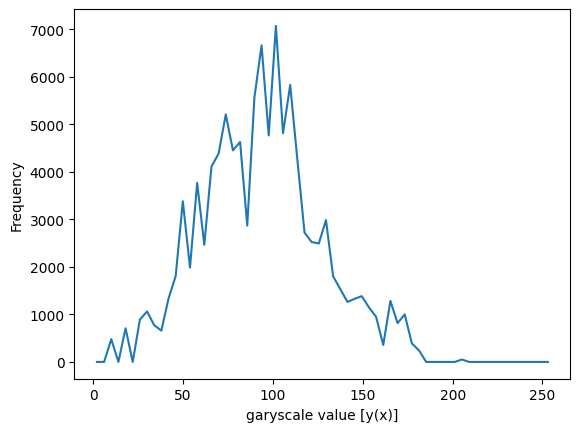

In [18]:

plt.plot(bin_centers,counts)
plt.xlabel("garyscale value [y(x)]")
plt.ylabel("Frequency")
plt.show()
# plt.savefig("y(x).png")


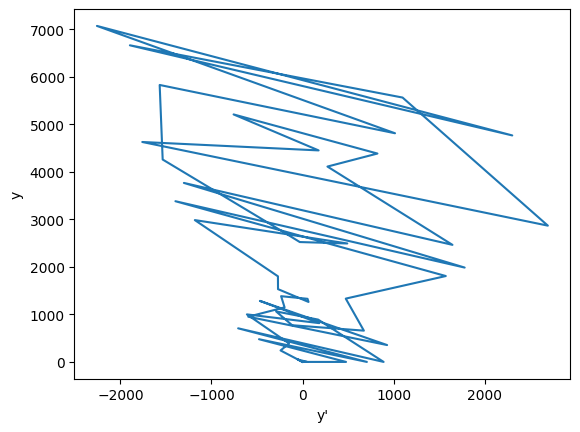

In [19]:
y_prime = np.diff(counts)


plt.plot(y_prime,counts[:-1])
plt.xlabel("y'")
plt.ylabel("y")
plt.show()
# plt.savefig("y-y'.png")